In [144]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [145]:
from numpy.random import rand, randn

In [146]:
n, d, k = 100, 2, 2

In [147]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas =[S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)


[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [148]:
def compute_log_p(data, mean_vec, cov_mat):
    det_cov = np.linalg.det(cov_mat)
    inv_cov = np.linalg.inv(cov_mat)
    # dim(data) = N x d
    N, d = np.shape(data)
    data_helper = np.concatenate((data,np.array([np.ones(N)]).T),axis=1)
    mean_vec = np.array([mean_vec])
    mean_helper = np.concatenate((np.eye(d), -mean_vec),axis=0)
    # data with zero mean
    centered_data = np.dot(data_helper, mean_helper)
    centered_scaled_data = (-1/2)*np.dot(centered_data,np.dot(inv_cov, np.transpose(centered_data)))
    pdf = np.exp(centered_scaled_data) / ( np.sqrt( (2*np.pi)**d * det_cov ) )
    pdf = np.diag(pdf)
    return pdf

In [149]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping
s= [print(m) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping
s= [print(s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

[0.69872366 0.75176984]
[0.25997411 0.14504062]
[[0.01764816 0.        ]
 [0.         0.06360523]]
[[0.01764816 0.        ]
 [0.         0.06360523]]


In [150]:
assignments = np.argmax(log_ps, axis=0)

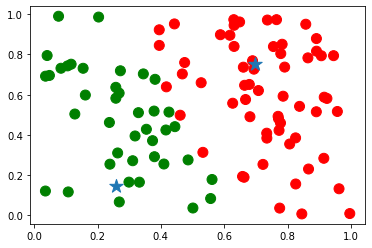

In [151]:
colors = (np.array(["red", "green"])[assignments])
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.transpose(means)[0], np.transpose(means)[1], marker='*', s=200)
plt.show()

In [152]:
print(np.transpose(means))


[[0.69872366 0.25997411]
 [0.75176984 0.14504062]]
